## Problem wielorękiego bandyty
Na zajęciach rozważaliśmy zadanie wielorękiego bandyty:

Mamy wiele maszyn, z których każde ma pewną nieznaną funkcję nagrody. "Granie" polega na wyborze maszyny, od której nagrodę otrzymamy. Celem jest granie tak, aby zdobyć sumarycznie jak największą nagrodę.

## Eksploracja kontra eksploatacja

Aby zdobyć dużą nagrodę, agent chciałby grać często na maszynie, która do tej pory się sprawdzała. Powinien jednak czasem grać na tych mniej obiecujących, bo być może okażą się one lepsze.

## Niestacjonarny

Dodatkowym utrudnieniem często występującym w praktycznych zastosowaniach jest niestacjonarność. Rozkład nagrody może zależeć od tego, jak długo trwa gra.

## Zadanie
Zadanie 2.5 ze strony 33 "Reinforcement Learning: An Introduction" Sutton, Barto. Czyli:

Zwizualizuj problemy, jakie napotykają metody estymujące średnią dla niestacjonarnych bandytów. Narysuj wykres, gdzie na osi OX będzie liczba losowań, a na osi OY % wyboru optymalnej akcji. Użyj $\alpha = 0.1$, $\varepsilon = 0.1$, 100 000 losowań.

Zacznij od 10 bandytów $\mathcal{N}(0, 1)$. Po każdym losowaniu do rozkładu każdego z bandytów dodaj liczbę wylosowaną (niezależnie dla każdego z bandytów) z rozkładu $\mathcal{N}(0, 0.01)$ i kumuluj je.

(Nie mam pewności, czy opisałem to w sposób zrozumiały. W razie wątpliwości proszę pytać.)



In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

class UnstableGaussianBandit:
    def __init__(self, mean=0, std=1, std_unstable=0.01):
        self.mean = mean
        self.std = std
        self.std_unstable = std_unstable
    
    def pull(self):
        return  np.random.normal(self.mean, self.std)
    def update(self):
        self.mean += np.random.normal(0, self.std_unstable)
    def return_mean(self):
        return self.mean
    def __str__(self):
        return f"UnstableGaussianBandit(mean={self.mean}, std={self.std}, std_unstable={self.std_unstable})"
    
Bandits=[UnstableGaussianBandit() for _ in range(10)]
qn = np.zeros(10); eps=0.1; alpha=0.1

for bandit in Bandits:
    print(bandit)

UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)
UnstableGaussianBandit(mean=0, std=1, std_unstable=0.01)


Text(0, 0.5, 'optimal action')

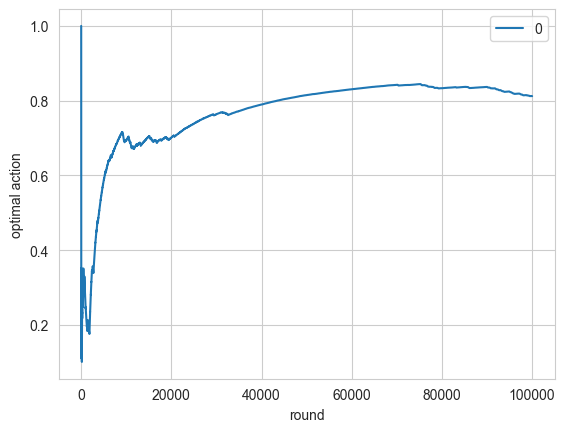

In [60]:
def epsilon_greedy(qn, eps):
    if np.random.rand() < eps:
        return np.random.randint(10)
    else:
        return np.argmax(qn)

def qn_update(qn, action, reward, alpha):
    qn[action] += alpha * (reward - qn[action])
    return qn

def play_bandits(Bandits, qn, eps, alpha, n_steps):
    n_optimal = 0
    score=[0]*n_steps
    for i in range(n_steps):
        optimal_bandit = np.argmax([bandit.return_mean() for bandit in Bandits])
        action = epsilon_greedy(qn, eps)
        reward = Bandits[action].pull()
        for bandit in Bandits:
            bandit.update()
        qn = qn_update(qn, action, reward, alpha)
        if action == optimal_bandit:
            n_optimal += 1
        score[i] = n_optimal/(i+1)
    return score,qn, Bandits


s,q,b=play_bandits(Bandits, qn, eps, alpha, 100_000)
sns.lineplot(data=pd.DataFrame(s))
plt.xlabel('round')
plt.ylabel('optimal action')

In [61]:
q

array([ 1.10106175,  0.30450694, -3.28708315, -0.13239942, -1.83927609,
       -0.12633029,  0.90225406,  0.03009719, -2.78403024,  1.04613816])

In [62]:
i=0
for bandit in b:
    print(i, sep='', end=' ')
    print(bandit, sep='', end='')
    print()
    i+=1

0 UnstableGaussianBandit(mean=1.358853474352471, std=1, std_unstable=0.01)
1 UnstableGaussianBandit(mean=0.31229624966742464, std=1, std_unstable=0.01)
2 UnstableGaussianBandit(mean=-3.0011530599042926, std=1, std_unstable=0.01)
3 UnstableGaussianBandit(mean=0.4672806037943089, std=1, std_unstable=0.01)
4 UnstableGaussianBandit(mean=-2.238598293480028, std=1, std_unstable=0.01)
5 UnstableGaussianBandit(mean=-0.21324512305668314, std=1, std_unstable=0.01)
6 UnstableGaussianBandit(mean=1.0869746731207632, std=1, std_unstable=0.01)
7 UnstableGaussianBandit(mean=-0.16366817087408836, std=1, std_unstable=0.01)
8 UnstableGaussianBandit(mean=-2.8400602711465783, std=1, std_unstable=0.01)
9 UnstableGaussianBandit(mean=1.6094391907870804, std=1, std_unstable=0.01)


## Wnioski
- W miarę jak gra postępowała, agent zaczął wybierać coraz częściej optymalną maszynę i po 30000 krokach wybierał ją w około 80% przypadków, bo prawdopodobnie te maszyny bardzo się różniły jak widać po końcowych wartościach średnich.
- Każdy symulacja bardzo różni się od innych ze względu na losowość, ale w każdej z nich widać, że agent zaczął wybierać coraz częściej optymalną maszynę.

Text(0, 0.5, 'optimal action')

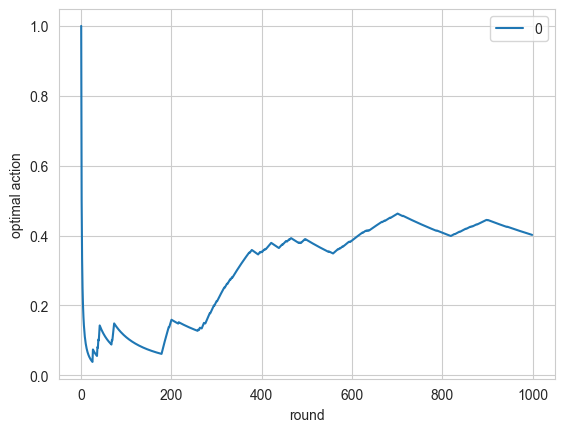

In [63]:
Bandits=[UnstableGaussianBandit() for _ in range(10)]
qn = np.zeros(10); eps=0.1; alpha=0.1
s,q,b=play_bandits(Bandits, qn, eps, alpha, 1000)
sns.lineplot(data=pd.DataFrame(s))
plt.xlabel('round')
plt.ylabel('optimal action')

In [65]:
i=0
for bandit in b:
    print(q[i], sep='', end=' ')
    print(bandit, sep='', end='')
    print()
    i+=1

-0.15336220424126099 UnstableGaussianBandit(mean=-0.06576017344030363, std=1, std_unstable=0.01)
0.11740743434817472 UnstableGaussianBandit(mean=-0.12960531834394828, std=1, std_unstable=0.01)
-0.1569661548427611 UnstableGaussianBandit(mean=-0.155798476621506, std=1, std_unstable=0.01)
-0.16284586500899786 UnstableGaussianBandit(mean=0.15076779546340982, std=1, std_unstable=0.01)
-0.18824493304911466 UnstableGaussianBandit(mean=0.07309311014475862, std=1, std_unstable=0.01)
-0.07030772178004721 UnstableGaussianBandit(mean=0.004492824385062926, std=1, std_unstable=0.01)
-0.6872826616679614 UnstableGaussianBandit(mean=-0.6858034708787297, std=1, std_unstable=0.01)
0.6249110443884492 UnstableGaussianBandit(mean=0.25239959768279946, std=1, std_unstable=0.01)
-0.25024805504462155 UnstableGaussianBandit(mean=-0.43955063046282644, std=1, std_unstable=0.01)
-0.15916345606568144 UnstableGaussianBandit(mean=0.3232786444263543, std=1, std_unstable=0.01)


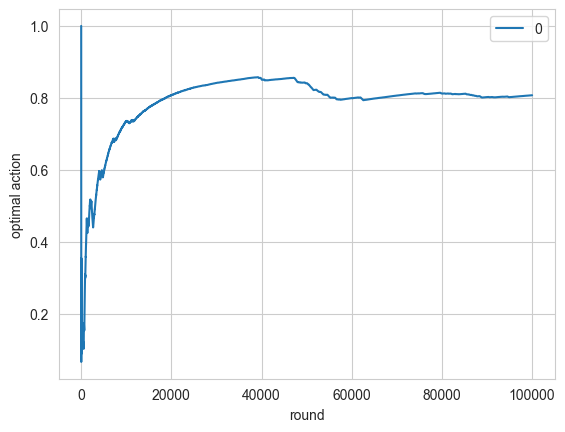

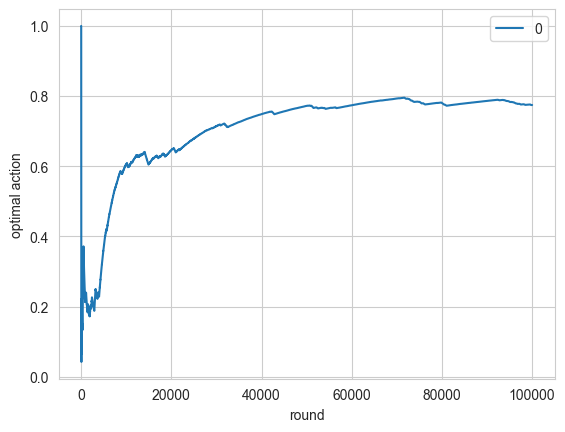

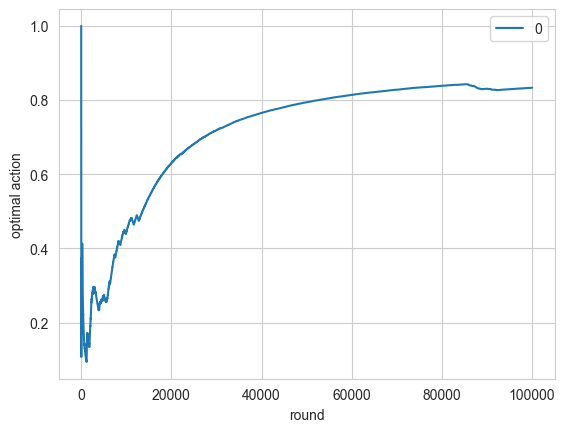

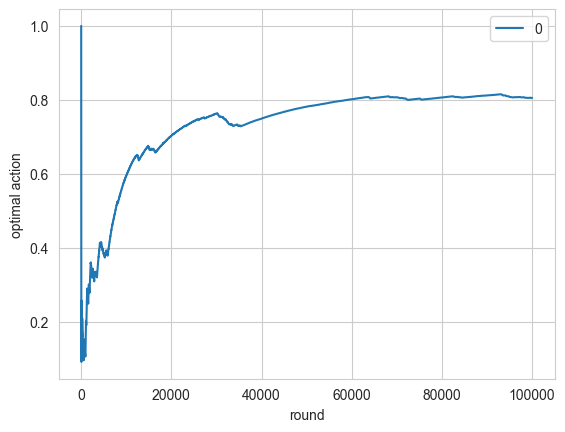

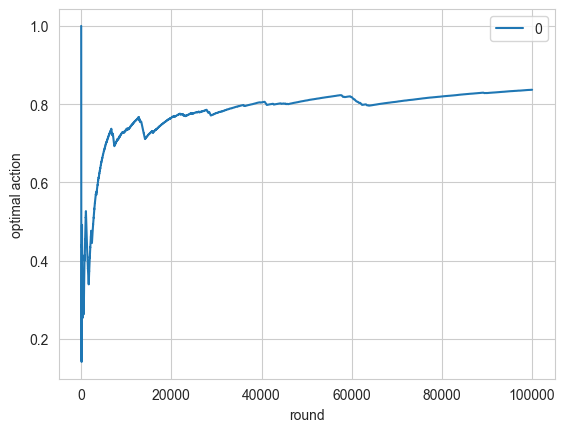

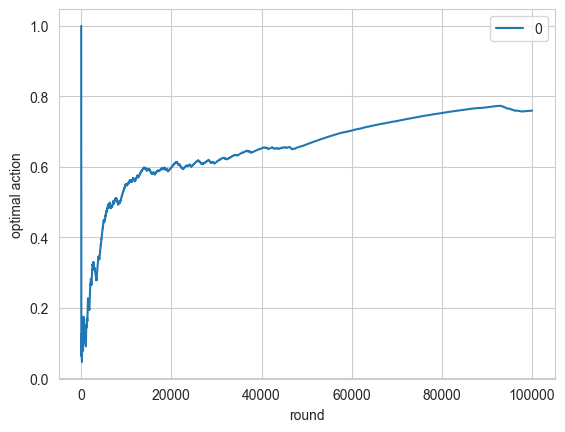

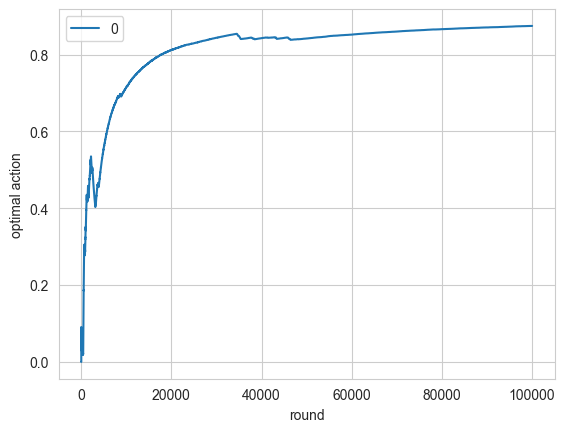

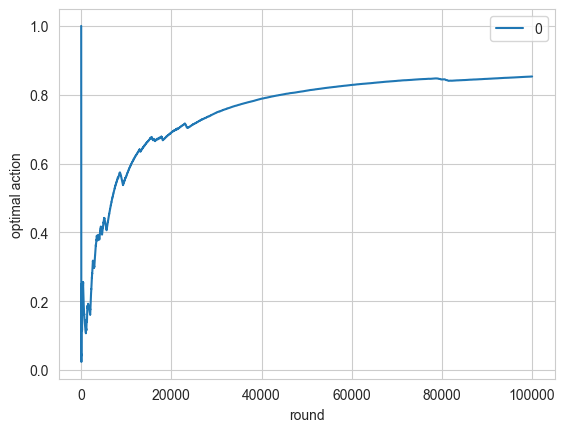

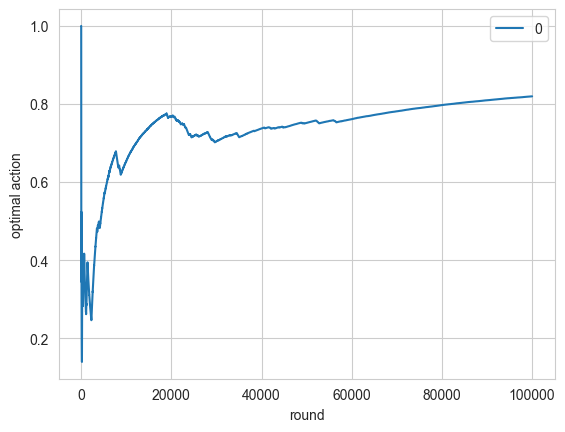

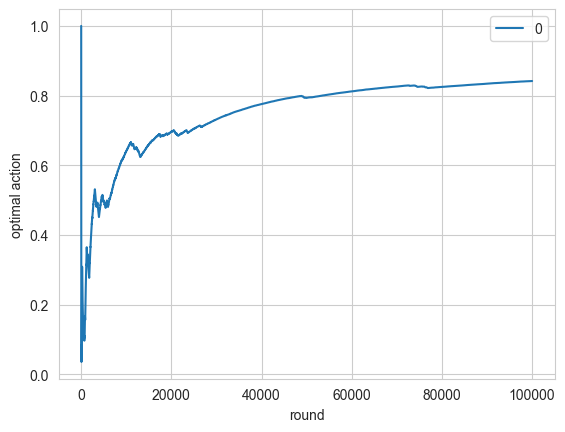

In [67]:
for i in range(10):
    Bandits=[UnstableGaussianBandit() for _ in range(10)]
    qn = np.zeros(10); eps=0.1; alpha=0.1
    s,q,b=play_bandits(Bandits, qn, eps, alpha, 100000)
    sns.lineplot(data=pd.DataFrame(s))
    plt.xlabel('round')
    plt.ylabel('optimal action')
    plt.show()

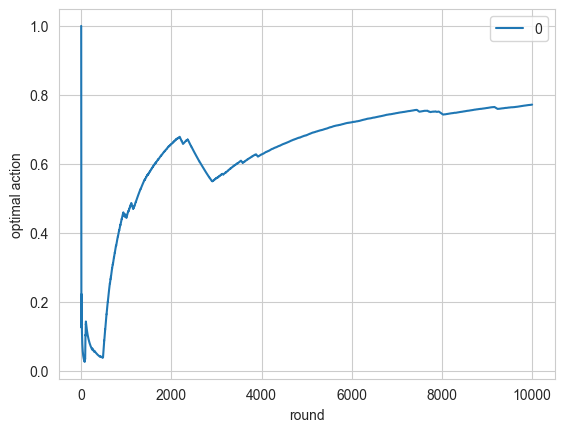

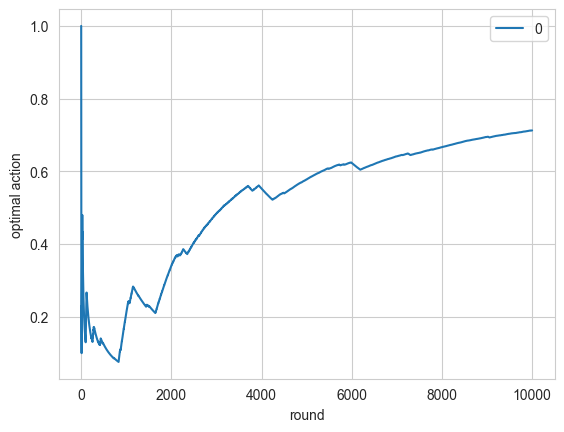

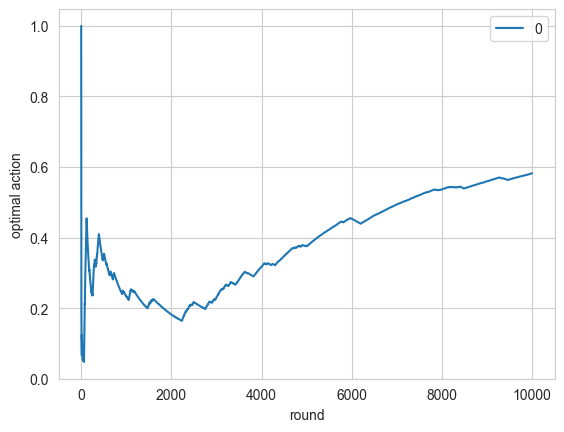

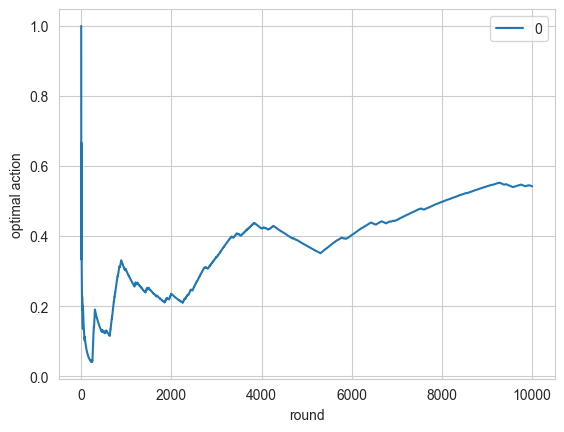

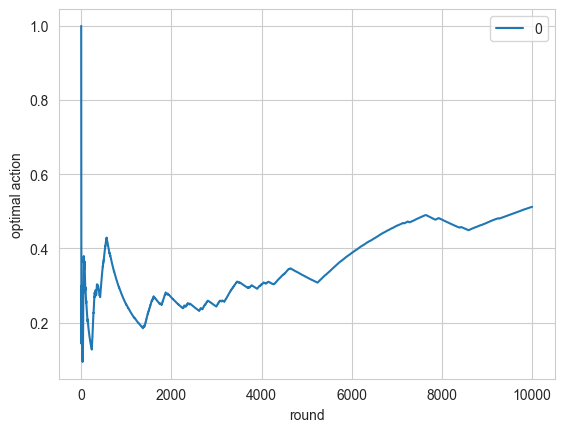

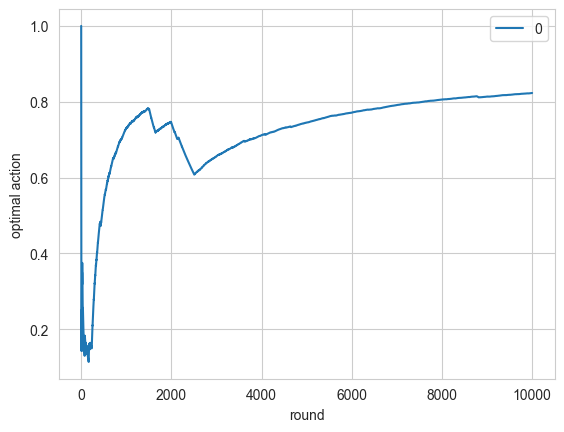

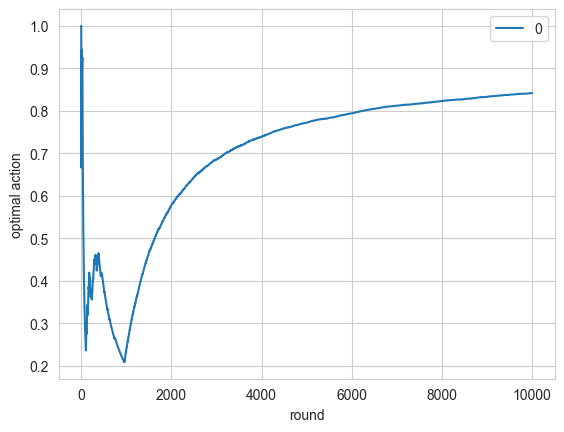

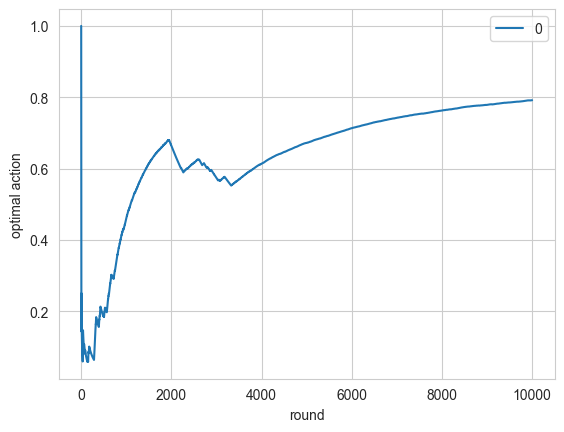

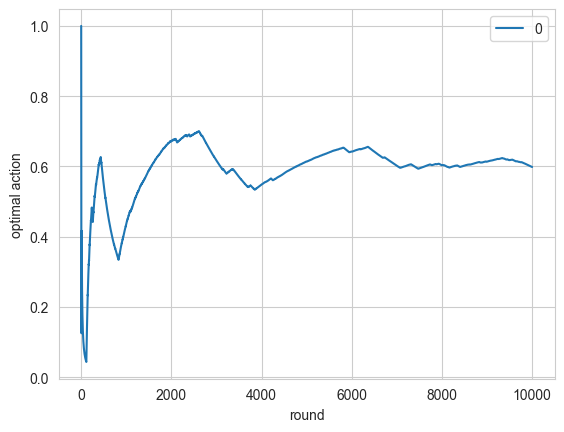

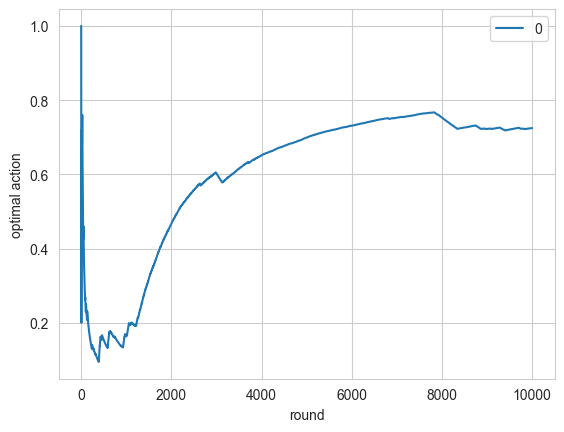

In [69]:
for i in range(10):
    Bandits=[UnstableGaussianBandit() for _ in range(10)]
    qn = np.zeros(10); eps=0.1; alpha=0.1
    s,q,b=play_bandits(Bandits, qn, eps, alpha, 10000)
    sns.lineplot(data=pd.DataFrame(s))
    plt.xlabel('round')
    plt.ylabel('optimal action')
    plt.show()

## Wnioski
- Każda gra na przestrzeni 10000 rund wygląda całkowicie inaczej, ale w każdej z nich widać, że agent zaczął wybierać coraz częściej optymalną maszynę, co stabilizuje się po około zazwyczaj 30000 rundach.
- Niestacjonarność sprawia, że sytuacja się zmienia i agent długo gra na maszynach, które były optymalne, ale przestały być.
- W tym przykładzie po 30000 rundach każdy bandyta już tak bardzo się różnił, że agent miał dużo czasu na zbieżność do optymalnego wyboru.
- Wraz z postępem gry optymalny bandyta rzadziej zmienia się, co ułatwia agentowi.
- W naturalnych warunkach bandyci mogę się tak nieregularnie zmieniać, że agent nie zdążyłby się nauczyć, który jest optymalny.